In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> IMDb Movie EDA </font>

The DataSet for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online.

## Reading the data

In [3]:
# Read the csv file
movies = pd.read_csv("/Users/ankuranurag/Desktop/Movie+Assignment+Data.csv")
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [4]:
# number of rows and columns in the dataframe
movies.shape

(100, 62)

In [5]:
# the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [6]:
# the summary for the numeric columns 
movies.describe(include=['int64','float64'])

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


In [7]:
#Updated missing values of MetaCritic from data on MetaCritic website
movies.loc[movies.Title=='The Hobbit: An Unexpected Journey','MetaCritic'] = 58
movies.loc[movies.Title=='Lone Survivor','MetaCritic'] = 60
movies.loc[movies.Title=='About Time','MetaCritic'] = 55
movies.loc[movies.Title=='The Book Thief','MetaCritic'] = 53
movies.loc[movies.Title=='Flipped','MetaCritic'] = 45

In [8]:
# Set actor_2_facebook_likes and actor_3_facebook_likes to zero
movies.actor_2_facebook_likes.fillna(0,inplace=True)
movies.actor_3_facebook_likes.fillna(0,inplace=True)
#genre_2 and genre_2 columns is left with null values as it won't effect our analysis

The numbers in the `budget` and `gross` are too big, compromising its readability.Converted the unit of the `budget` and `gross` columns from `$` to `million $`.

In [9]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies[['budget','Gross']] = movies[['budget','Gross']].apply(lambda x:round(x/1000000,2))

-  ###  Added some colums to the dataset to encourage better Analysis

    1. Created a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sorted the dataframe using the `profit` column as reference.
    3. Extracted the top ten profiting movies in descending order and stored them in a new dataframe - `top10`.
    4. Ploted a scatter or a joint plot between the columns `budget` and `profit` and wrote the observation.
    5. Extracted the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [10]:
# Create the new column named 'profit'
movies['profit'] =movies.Gross - movies.budget

In [11]:
# Sort the dataframe with the 'profit' column as reference 

movies.sort_values(by='profit',ascending=False,inplace=True)

In [12]:
# top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

movies.iloc[0:10,:]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.66,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.66
11,The Avengers,2012,220.0,623.28,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.28
47,Deadpool,2016,58.0,363.02,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.02
32,The Hunger Games: Catching Fire,2013,130.0,424.65,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.65
12,Toy Story 3,2010,200.0,414.98,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98
8,The Dark Knight Rises,2012,250.0,448.13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13
45,The Lego Movie,2014,60.0,257.76,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.76
1,Zootopia,2016,150.0,341.27,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.27
41,Despicable Me,2010,69.0,251.50,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.50
18,Inside Out,2015,175.0,356.45,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.45


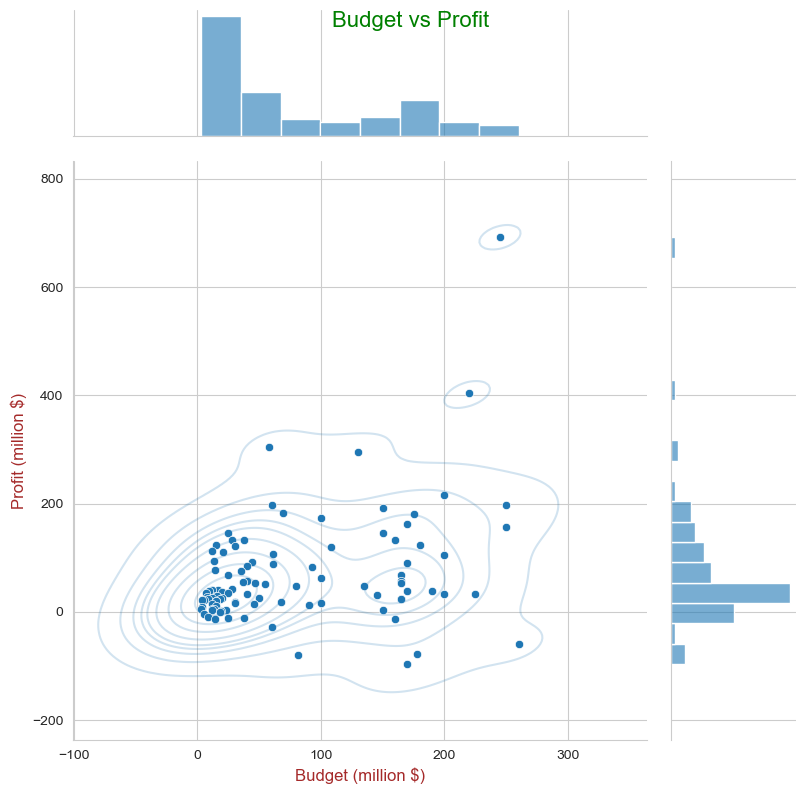

In [13]:
#Plot profit vs budget
sns.set_style('whitegrid')
b_v_p = sns.jointplot(data=movies,x='budget',y='profit',height=8, ratio=4, space=0.2,kind='scatter',joint_kws={'alpha':1},marginal_kws={'alpha':0.6})
b_v_p.plot_joint(sns.kdeplot, levels=10, alpha=0.2)
b_v_p.set_axis_labels('Budget (million $)', 'Profit (million $)', fontsize=12,c='brown')
b_v_p.fig.suptitle('Budget vs Profit',fontsize=16,c='g')
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. There are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses.

In [14]:
# the movies with negative profit
movies[movies.profit<0][["Title","budget","Gross","profit"]].sort_values(by='profit',ignore_index=True)

,Title,budget,Gross,profit
0,Hugo,170.0,73.82,-96.18
1,The Little Prince,81.2,1.34,-79.86
2,Edge of Tomorrow,178.0,100.19,-77.81
3,Tangled,260.0,200.81,-59.19
4,Scott Pilgrim vs. the World,60.0,31.49,-28.51
5,X-Men: First Class,160.0,146.41,-13.59
6,Flipped,14.0,1.75,-12.25
7,Warrior,25.0,13.65,-11.35
8,Rush,38.0,26.90,-11.10
9,Amour,8.9,0.23,-8.67


**`Checkpoint:`** the movie `Tangled` in the dataset, although being one of the highest grossing movies of all time, it has negative profit as per this result. If cross checked the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), it can be observed that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Analysis on the General Audience and the Critics

the column `MetaCritic` in this dataset represents an average score determined through the scores given by the top-rated critics. Second, the column `IMDb_rating` which tells the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 
    

In [15]:
# Change the scale of MetaCritic to 10 from 100
movies['MetaCritic'] = movies.MetaCritic.apply(lambda x:round(x/10,1))

In [16]:
# Find the average ratings
movies['Avg_rating']=(movies.MetaCritic+movies.IMDb_rating)/2

In [17]:
#Sort in descending order of average rating
movies.sort_values(by='Avg_rating',ascending=False,inplace=True)

In [18]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)
UniversalAcclaim = movies[(abs(movies.IMDb_rating-movies.MetaCritic)<0.5)&(movies.Avg_rating>=8.0)]
UniversalAcclaim.reset_index(drop=True,inplace=True)

In [19]:
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
0,Whiplash,2014,3.3,13.09,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.79,8.65
1,Django Unchained,2012,100.0,162.80,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.80,8.25
2,Dallas Buyers Club,2013,5.0,27.30,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.30,8.20
3,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.66,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.66,8.10
4,Arrival,2016,47.0,100.55,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.55,8.05
5,Gone Girl,2014,61.0,167.74,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.74,8.00
6,The Martian,2015,108.0,228.43,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.43,8.00


- ### Analysis 1 Finding the Most Popular Trios - I

The objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.


In [20]:
movies['Total_likes'] = movies.actor_1_facebook_likes+movies.actor_2_facebook_likes+movies.actor_3_facebook_likes

In [21]:
top_5_popluar_trios = movies.sort_values(by='Total_likes',ascending=False,ignore_index=True).iloc[0:5,4:7]
# top 5 popular trios
top_5_popluar_trios

,actor_1_name,actor_2_name,actor_3_name
0,Dev Patel,Nicole Kidman,Rooney Mara
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
3,Casey Affleck,Michelle Williams,Kyle Chandler
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt


In [22]:
# top 5 popular trios in list
top_5_popluar_trios.values.tolist()

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Analysis 2 Finding the Most Popular Trios - II

In the previous section the popular trio based on the total number of facebook likes was obtained. The condition is **none of the three actors' Facebook likes should be less than half of the other two**.

In [23]:
top_5_filter_list = movies[~((movies.actor_1_facebook_likes<movies.actor_2_facebook_likes//2)|(movies.actor_1_facebook_likes<movies.actor_3_facebook_likes//2)
|(movies.actor_2_facebook_likes<movies.actor_1_facebook_likes//2)|(movies.actor_2_facebook_likes<movies.actor_3_facebook_likes//2)|
(movies.actor_3_facebook_likes<movies.actor_2_facebook_likes//2)|(movies.actor_3_facebook_likes<movies.actor_1_facebook_likes//2))]

In [24]:
top_5_filter_list.sort_values(by='Total_likes',ascending=False,inplace=True)
top_5_filter_list.iloc[0:3:,4:7].values.tolist()

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Analysis3 Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

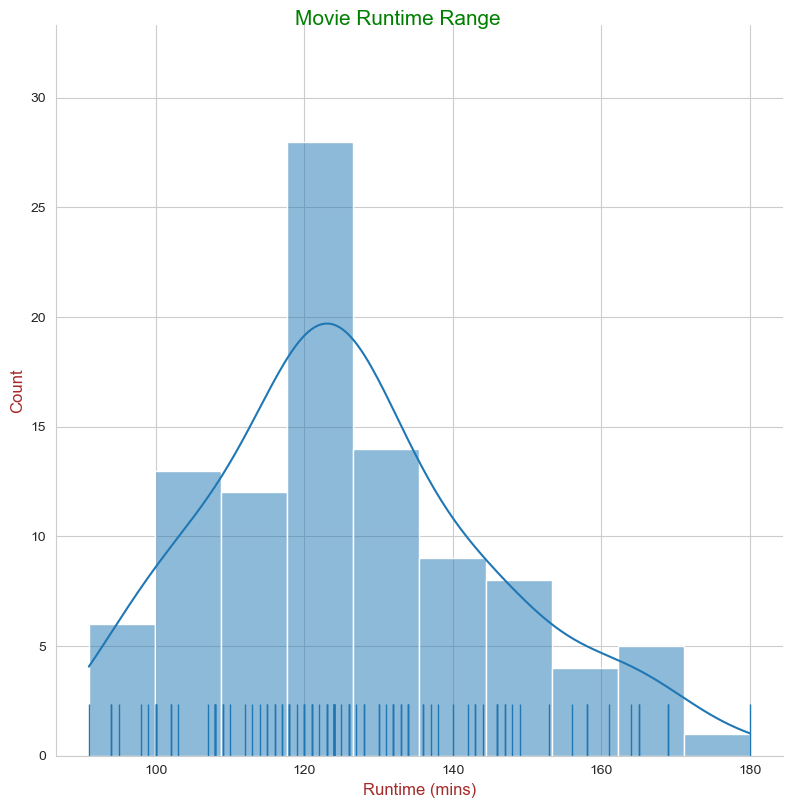

In [25]:
# Runtime histogram/density plot
sns.set_style("whitegrid")
dis_runtime = sns.displot(data=movies,x='Runtime',height=8,kde=True,rug=True,rug_kws={'height':0.07})
dis_runtime.set_axis_labels('Runtime (mins)','Count',fontsize=12,c='brown')
dis_runtime.fig.suptitle("Movie Runtime Range",fontsize=15,c='g',y=1.0)
plt.show()

**`Checkpoint:`** Most of the movies appear to be sharply 2 hour-long.

- ### Analysis4: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, identifying the top 10 movie and storing them in a dataframe named `PopularR` for further analysis

In [26]:
PopularR = movies[movies['content_rating']=='R'][['Title','CVotesU18']]
PopularR.sort_values(by='CVotesU18',ascending=False,ignore_index=True).head(10)

,Title,CVotesU18
0,Deadpool,4598
1,The Wolf of Wall Street,3622
2,Django Unchained,3250
3,Mad Max: Fury Road,3159
4,Whiplash,2878
5,The Revenant,2619
6,Shutter Island,2321
7,Gone Girl,2286
8,The Grand Budapest Hotel,2083
9,Birdman or (The Unexpected Virtue of Ignorance),1891


**`Checkpoint:`** Under Age kids are watching `Deadpool` a lot

## Performing Demographic analysis

-  ###  Analisis5 Combining the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this analysis, the three columns are aggregated  
1. Created a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. New column called `cnt` to the dataframe `df_by_genre` and initialized it to one.
3. Group the dataframe `df_by_genre` by `genre_1` and sum all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Performed the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Added the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers.


In [27]:
# Created the dataframe df_by_genre
df_by_genre = movies[movies.loc[:,'genre_1':'genre_3'].columns.append(movies.loc[:,'CVotes10':'VotesnUS'].columns)]
df_by_genre.shape

(100, 47)

In [28]:
# Created a column cnt and initialize it to 1
df_by_genre.loc[:,'cnt'] = 1

In [29]:
# Grouped the movies by individual genres
df_by_g1 = df_by_genre.groupby(['genre_1']).sum()
df_by_g2 = df_by_genre.groupby(['genre_2']).sum()
df_by_g3 = df_by_genre.groupby(['genre_3']).sum()

In [30]:
# Added the grouped data frames and store it in a new data frame
df_add = df_by_g1.add((df_by_g2.add(df_by_g3,axis=1,fill_value=0)),axis=1,fill_value=0)

In [31]:
df_add.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [32]:
# Extracted genres with atleast 10 occurences
genre_top10 = df_add[df_add['cnt']>=10]
genre_top10.iloc[:,-1]

Action       31.0
Adventure    38.0
Animation    11.0
Biography    18.0
Comedy       23.0
Crime        11.0
Drama        65.0
Romance      13.0
Sci-Fi       17.0
Thriller     13.0
Name: cnt, dtype: float64

In [33]:
# Take the mean for every column by dividing with cnt 
genre_top10.loc[:,'CVotes10':'VotesnUS'] = np.transpose([genre_top10[i]/genre_top10['cnt'] for i in genre_top10.loc[:,'CVotes10':'VotesnUS']])
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0


In [34]:
# Rounding off the columns of Votes to two decimals
genre_top10.loc[:,'VotesM':'VotesnUS'].apply(lambda x: round(x,2))

,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76
Adventure,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79
Animation,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83
Biography,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77
Comedy,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78
Crime,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80
Drama,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78
Romance,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70
Sci-Fi,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88
Thriller,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81


In [35]:
# Converting CVotes to int type
genre_top10.loc[:,'CVotes10':'CVotesnUS'].astype('int64')

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,36996,155623,132836,20627,28862,24092,4269,681,69190,225998
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,39896,138490,115795,20750,26641,21910,4267,662,61734,208034
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,39314,94853,75824,17751,16305,12966,3063,578,47673,150424
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,29157,111073,92158,17354,22550,18039,4126,600,45389,171004
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,37509,106680,86346,18841,19954,15979,3621,605,49220,165869
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,28310,121645,102671,17292,22867,18799,3658,620,49928,181338
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,29896,106122,87644,16964,21612,17422,3806,585,44164,161234
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,37926,80768,62253,17350,15719,12054,3381,548,37141,131254
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,45269,188483,160141,25620,36127,30141,5340,714,80695,272068
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,36989,153475,129421,21922,29590,24421,4654,669,63361,228944


In [36]:
# Concatenating to get genre_top10 with updated dtypes
genre_top10 = pd.concat([genre_top10.loc[:,'CVotes10':'CVotesnUS'].astype('int64'),genre_top10.loc[:,'VotesM':'VotesnUS'].apply(lambda x: round(x,2)),genre_top10.cnt],axis=1)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


the final dataframe have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. Can use this dataset to extract exciting insights about the voters!

-  ###  Analysis6: Genre Counts!

bar chart plotting different genres vs cnt using seaborn.

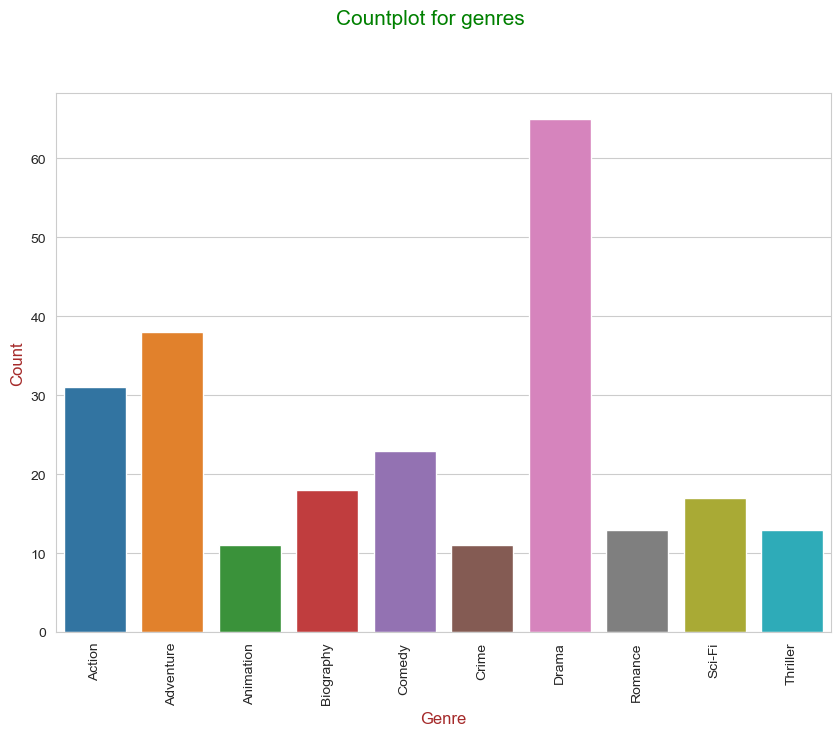

In [37]:
# Countplot for genres
plt.figure(figsize=[10,7])
sns.barplot(x=genre_top10.index,y=genre_top10.cnt)
plt.xlabel('Genre',fontsize=12,c='brown')
plt.ylabel('Count',fontsize=12,c='brown')
plt.suptitle("Countplot for genres",fontsize=15,c='g',y=1.0)
plt.xticks(rotation=90)
plt.show()

**`Checkpoint:`** the bar for `Drama` is the tallest

-  ###  Analysis7: Gender and Genre

In the Votes- and CVotes-related columns, the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, i want to observe the popularity of genres vary between the two genders in the dataframe. 

1. The first heatmap is to see how the average number of votes of males is varying across the genres. The X-axis contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis have the genres and the annotation in the heatmap giving the average number of votes for that age-male group. 

2. The second heatmap is to see how the average number of votes of females is varying across the genres. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis have the genres and the annotation in the heatmap giving the average number of votes for that age-female group. 

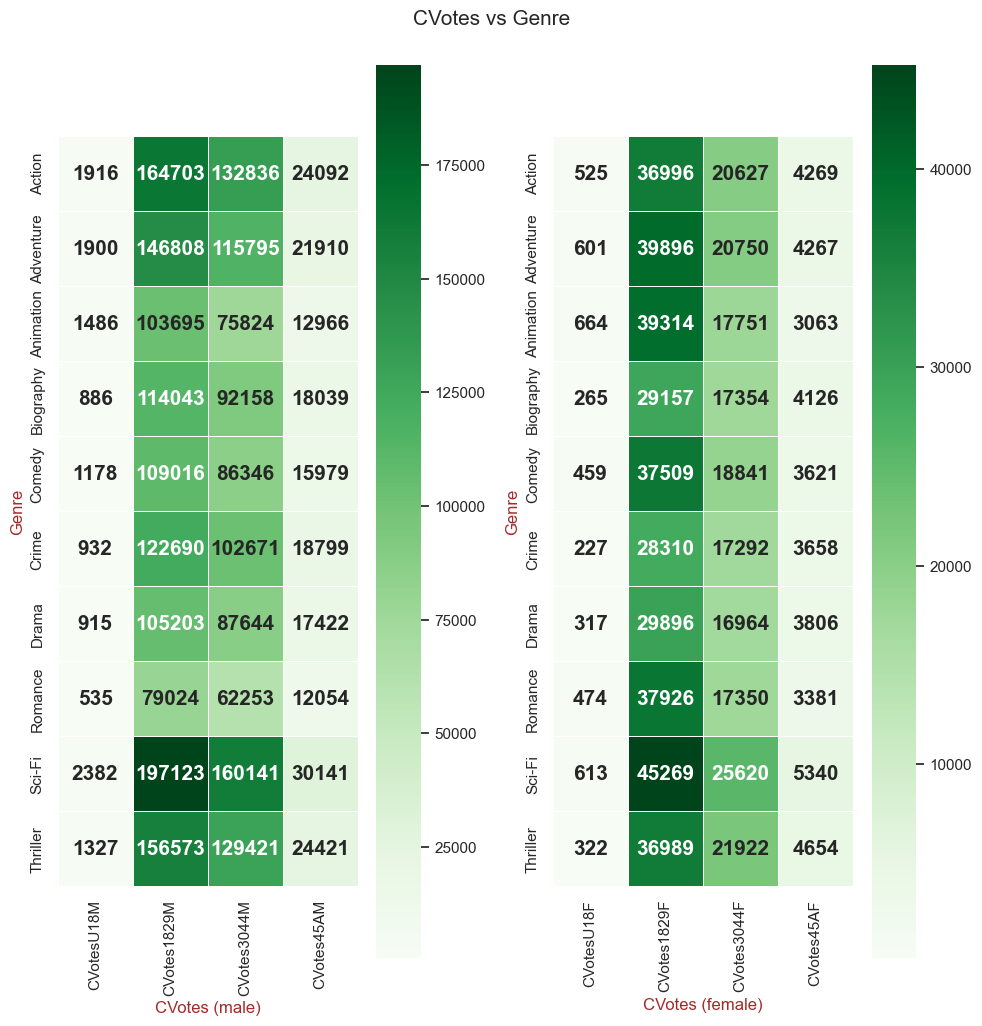

In [38]:
# 1st set of heat maps for CVotes-related columns
heatmap_male = genre_top10.groupby(genre_top10.index)[['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM']].mean().astype('int64')
heatmap_female = genre_top10.groupby(genre_top10.index)[['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF']].mean().astype('int64')
sns.set(rc = {'figure.autolayout':True})
fig, ax = plt.subplots(ncols=2,figsize=(10,10))
h_m = sns.heatmap(heatmap_male,annot=True,cmap='Greens',ax=ax[0],fmt="d",square=True,cbar=True,linewidths=0.5,annot_kws={'fontsize':15,'fontweight':'bold'})
fig.subplots_adjust(wspace=1.0)
h_f = sns.heatmap(heatmap_female,annot=True,cmap='Greens',ax=ax[1],fmt="d",square=True,cbar=True,linewidths=0.5,annot_kws={'fontsize':15,'fontweight':'bold',})
h_m.set_xlabel('CVotes (male)',fontsize=12,c='brown')
h_m.set_ylabel('Genre',fontsize=12,c='brown')
h_f.set_xlabel('CVotes (female)',fontsize=12,c='brown')
h_f.set_ylabel('Genre',fontsize=12,c='brown')
fig.suptitle('CVotes vs Genre',fontsize=15,y=1)
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:most of the votes are from 18-44 age group for both the genders indicating these age group are                 more interesed in watching movies
- Inference 2:Romance is the least preferred genre for males and Crime is the least preferred genre for females               in all age group
- Inference 3:Apart from Sci-Fi, Action, Adventure, Animation are next most poular genre among all age group                 irrespective of their gender

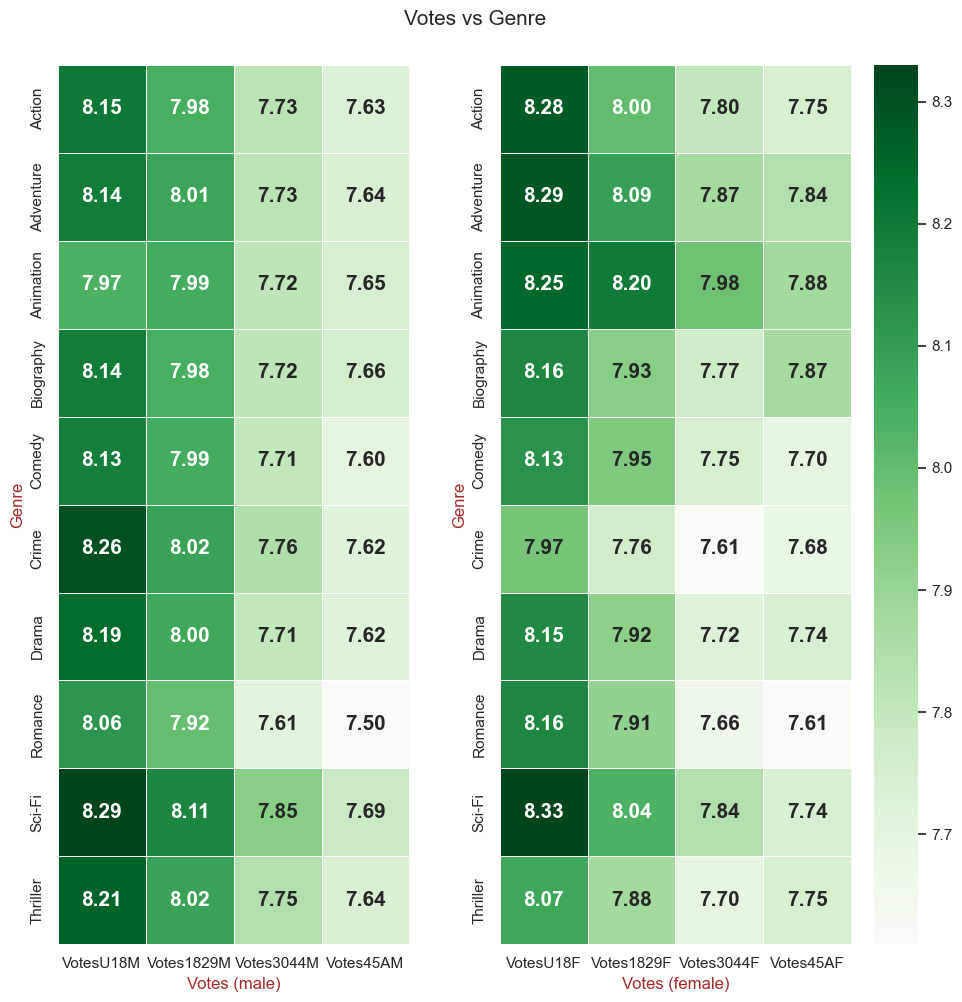

In [39]:
# 2nd set of heat maps for Votes-related columns
heatmap_male_v = genre_top10.groupby(genre_top10.index)[['VotesU18M','Votes1829M','Votes3044M','Votes45AM']].mean()
heatmap_female_v = genre_top10.groupby(genre_top10.index)[['VotesU18F','Votes1829F','Votes3044F','Votes45AF']].mean()
sns.set(rc = {'figure.autolayout':True})
fig, ax = plt.subplots(ncols=2,figsize=(10,10))
h_m = sns.heatmap(heatmap_male_v,annot=True,cmap='Greens',ax=ax[0],fmt="0.2f",square=True,cbar=False,linewidths=0.5,annot_kws={'fontsize':15,'fontweight':'bold'})
fig.subplots_adjust(wspace=0.5)
h_f = sns.heatmap(heatmap_female_v,annot=True,cmap='Greens',ax=ax[1],fmt="0.2f",square=True,cbar=True,linewidths=0.5,annot_kws={'fontsize':15,'fontweight':'bold',})
fig.suptitle('Votes vs Genre',fontsize=15,y=1)
h_m.set_xlabel('Votes (male)',fontsize=12,c='brown')
h_m.set_ylabel('Genre',fontsize=12,c='brown')
h_f.set_xlabel('Votes (female)',fontsize=12,c='brown')
h_f.set_ylabel('Genre',fontsize=12,c='brown')
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:With increasing age rating shows a decreasing pattern for both genders indicating people give                  more critical reviews with growing age.
- Inference 2:Age 45+ females give superior rating to movies of all genre than 45+ males.Males in this category are               more critial in rating movies than females. 
- Inference 3:Action, Adventure and Animation genre are more liked by females than males as indicated by their               average rating for the same.

-  ###  Analysis8: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. I'm analysing how both the US and the non-US voters have responded to the US and the non-US movies.

1. A new column `IFUS` in the dataframe `movies`, contains the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` contains the value `non-USA`.


2. A boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Similarly, another boxplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies.


3. Similar analysis done with the ratings.

In [40]:
# IFUS column
movies['IFUS'] = np.where(movies['Country']=='USA',"USA","non-USA")
movies[['Title','IFUS']].head(10)

,Title,IFUS
94,Boyhood,USA
69,12 Years a Slave,USA
18,Inside Out,USA
0,La La Land,USA
4,Manchester by the Sea,USA
12,Toy Story 3,USA
34,Gravity,non-USA
70,Spotlight,USA
95,Whiplash,USA
89,Amour,non-USA


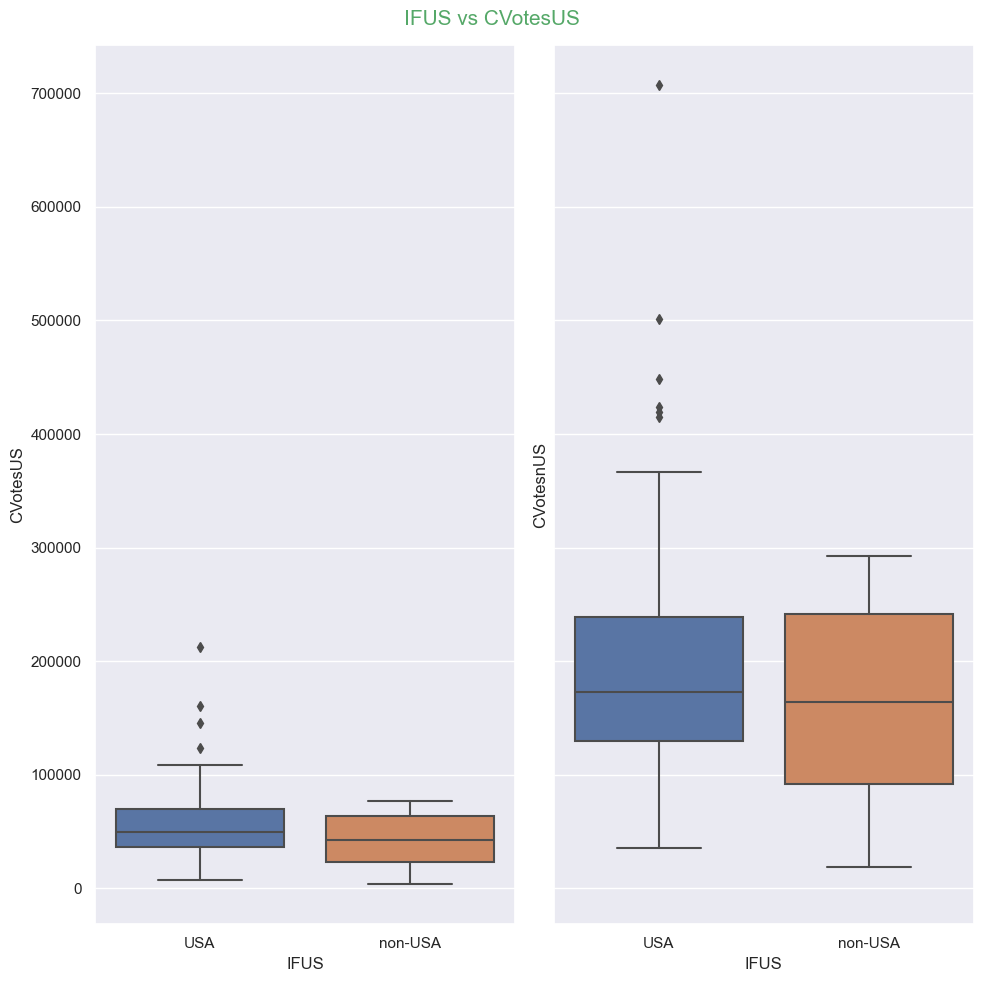

In [41]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
sns.set(rc = {'figure.autolayout':True})
fig, ax = plt.subplots(ncols=2,sharey=True,figsize=(10,10))
sns.boxplot(data=movies,x='IFUS',y='CVotesUS',ax=ax[0])
fig.subplots_adjust(wspace=0.7 )
sns.boxplot(data=movies,x='IFUS',y='CVotesnUS',ax=ax[1])
fig.suptitle("IFUS vs CVotesUS",fontsize=15,c='g')
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1:No. of votes from US people are far less than non-US people for both US and non-US movies.
- Inference 2:US people have voted more for US movies than non-US movies.In contrast the non-US people have                   also voted more for US movies than non-US movies.Both US and non-US people like US movies more                 than non-US movies.

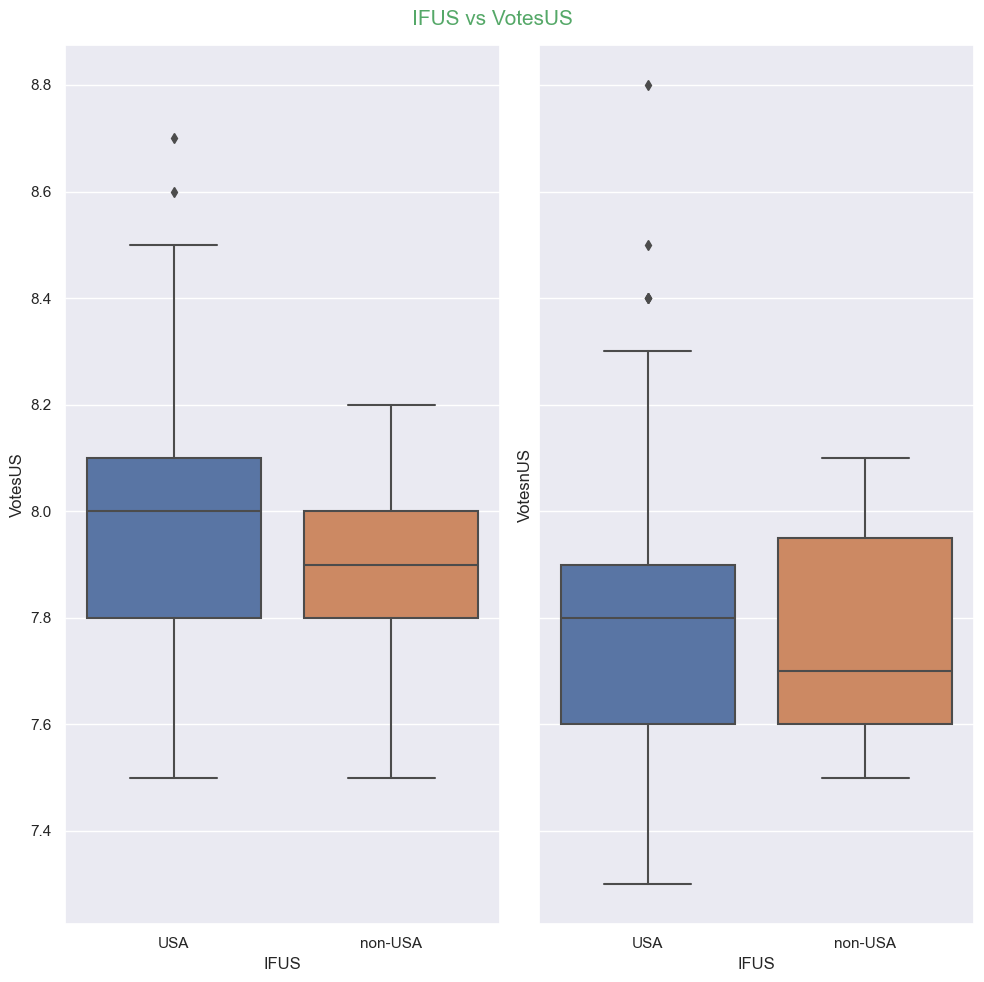

In [42]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
sns.set(rc = {'figure.autolayout':True})
fig, ax = plt.subplots(ncols=2,sharey=True,figsize=(10,10))
sns.boxplot(data=movies,x='IFUS',y='VotesUS',ax=ax[0])
fig.subplots_adjust(wspace=0.7 )
sns.boxplot(data=movies,x='IFUS',y='VotesnUS',ax=ax[1])
fig.suptitle("IFUS vs VotesUS",fontsize=15,c='g')
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: US people are more critical about non-US movies than US movies as observed from their ratings.
- Inference 2: Non-US people are more critical about US movies compaired to non-US movies as observed from                    their ratings.

-  ###  Analysis8:  Top 1000 Voters Vs Genres

The column `CVotes1000` represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie.

In [43]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000',ascending=False,inplace=True)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


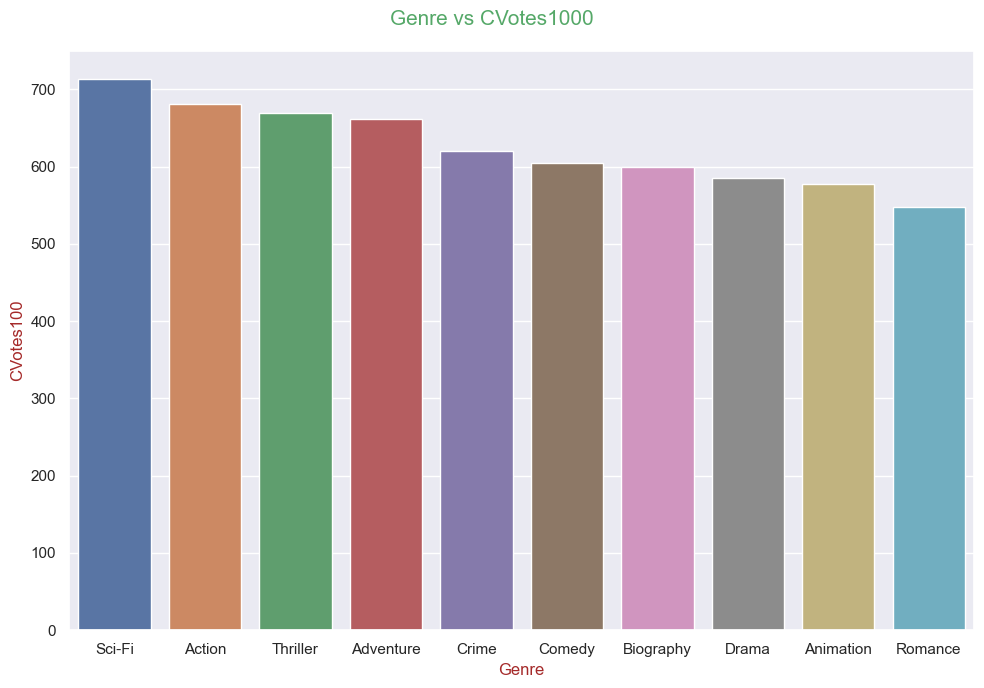

In [44]:
# Bar plot
sns.set_style('darkgrid')
plt.figure(figsize=[10,7])
sns.barplot(data=genre_top10,x=genre_top10.index,y='CVotes1000')
plt.xlabel('Genre',fontsize=12,c='brown')
plt.ylabel('CVotes100',fontsize=12,c='brown')
plt.suptitle('Genre vs CVotes1000',fontsize=15,c='g')
plt.show()

**`Inferences:`** Write your inferences/observations here.
As observed from above barplot and previous heatmaps Sci-Fi is the highest voted genre among people.This indicated that any movie of genre Sci-Fi will get more votes and better ratings. 

**`Checkpoint:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.